# Customer Churn Analysis

### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

## Importing and Exploring Churn Dataset

In [3]:
churn=pd.read_csv('Churn.csv')
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
16    8191-XWSZG  Female              0      No         No      52   
17    9959-WOFKT    Male              0      No        Yes      71   
18    4190-MFLUW  Female              0     Yes        Yes      10   
19    4183-MYFRB  Female              0      No         No      21   
20    8779-QRDMV    Male              1      No         No       1   
21    1680-VDCWW    Male              0     Yes         No      12   
22    1066-JKSGK    Male              0      No         No       1   
23    3638-WEABW  Female              0     Yes         No      58   
24    6322-HRPFA    Male              0     Yes        Yes      49   
25    6865-JZNKO  Female              0      No         No      30   
26    6467-CHFZW    Male              0     Yes        Yes      47   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
28    5248-YGIJN    Male              0     Yes         No      72   
29    8773-HHUOZ  Female              0      No        Yes      17   
30    3841-NFECX  Female              1     Yes         No      71   
31    4929-XIHVW    Male              1     Yes         No       2   
32    6827-IEAUQ  Female              0     Yes        Yes      27   
33    7310-EGVHZ    Male              0      No         No       1   
34    3413-BMNZE    Male              1      No         No       1   
35    6234-RAAPL  Female              0     Yes        Yes      72   
36    6047-YHPVI    Male              0      No         No       5   
37    6572-ADKRS  Female              0      No         No      46   
38    5380-WJKOV    Male              0      No         No      34   
39    8168-UQWWF  Female              0      No         No      11   
40    8865-TNMNX    Male              0     Yes        Yes      10   
41    9489-DEDVP  Female              0     Yes        Yes      70   
42    9867-JCZSP  Female              0     Yes        Yes      17   
43    4671-VJLCL  Female              0      No         No      63   
44    4080-IIARD  Female              0     Yes         No      13   
45    3714-NTNFO  Female              0      No         No      49   
46    5948-UJZLF    Male              0      No         No       2   
47    7760-OYPDY  Female              0      No         No       2   
48    7639-LIAYI    Male              0      No         No      52   
49    2954-PIBKO  Female              0     Yes        Yes      69   
50    8012-SOUDQ  Female              1      No         No      43   
51    9420-LOJKX  Female              0      No         No      15   
52    6575-SUVOI  Female              1     Yes         No      25   
53    7495-OOKFY  Female              1     Yes         No       8   
54    4667-QONEA  Female              1     Yes        Yes      60   
55    1658-BYGOY    Male              1      No         No      18   
56    8769-KKTPH

In [4]:
churn.shape

(7043, 21)

churn dataset has 7043 rows and 21 attributes

In [5]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Churn has above mentioned columns

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Most of the columns are categorical and even label column is categorical.

In [7]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

There are no null values in the label column

###### We will check the distinct variables in categorical columns

In [9]:
CC=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
CC

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
for i in CC:
    print('column name:',i,'and unique variables are ',churn[i].unique())

column name: gender and unique variables are  ['Female' 'Male']
column name: SeniorCitizen and unique variables are  [0 1]
column name: Partner and unique variables are  ['Yes' 'No']
column name: Dependents and unique variables are  ['No' 'Yes']
column name: tenure and unique variables are  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column name: PhoneService and unique variables are  ['No' 'Yes']
column name: MultipleLines and unique variables are  ['No phone service' 'No' 'Yes']
column name: InternetService and unique variables are  ['DSL' 'Fiber optic' 'No']
column name: OnlineSecurity and unique variables are  ['No' 'Yes' 'No internet service']
column name: OnlineBackup and unique variables are  ['Yes' 'No' 'No internet service']
column name: DeviceProtection and unique variables are  ['No' 'Yes' 'No inte

There are no null values categorical columns.

###### We will check the count of each variable the column.

In [11]:
for i in CC:
    print('column name:',i,'and unique variables are \n ',churn[i].value_counts(),'\n')

column name: gender and unique variables are 
  Male      3555
Female    3488
Name: gender, dtype: int64 

column name: SeniorCitizen and unique variables are 
  0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

column name: Partner and unique variables are 
  No     3641
Yes    3402
Name: Partner, dtype: int64 

column name: Dependents and unique variables are 
  No     4933
Yes    2110
Name: Dependents, dtype: int64 

column name: tenure and unique variables are 
  1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
52     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58

##### We understand that target column is imbalanced.

In [12]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Observation:
    
1)There is no big difference between 75% and max ,hence there is less possiblities of outliers.

2)Mean and median are also close.

In [13]:
#We could see totalCharges is continous type of column while visauly analysing the dataset.

#Data type seems to be object type, Which leads to possiblity of blank spaces.

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
ncols,nrows=(12,2)

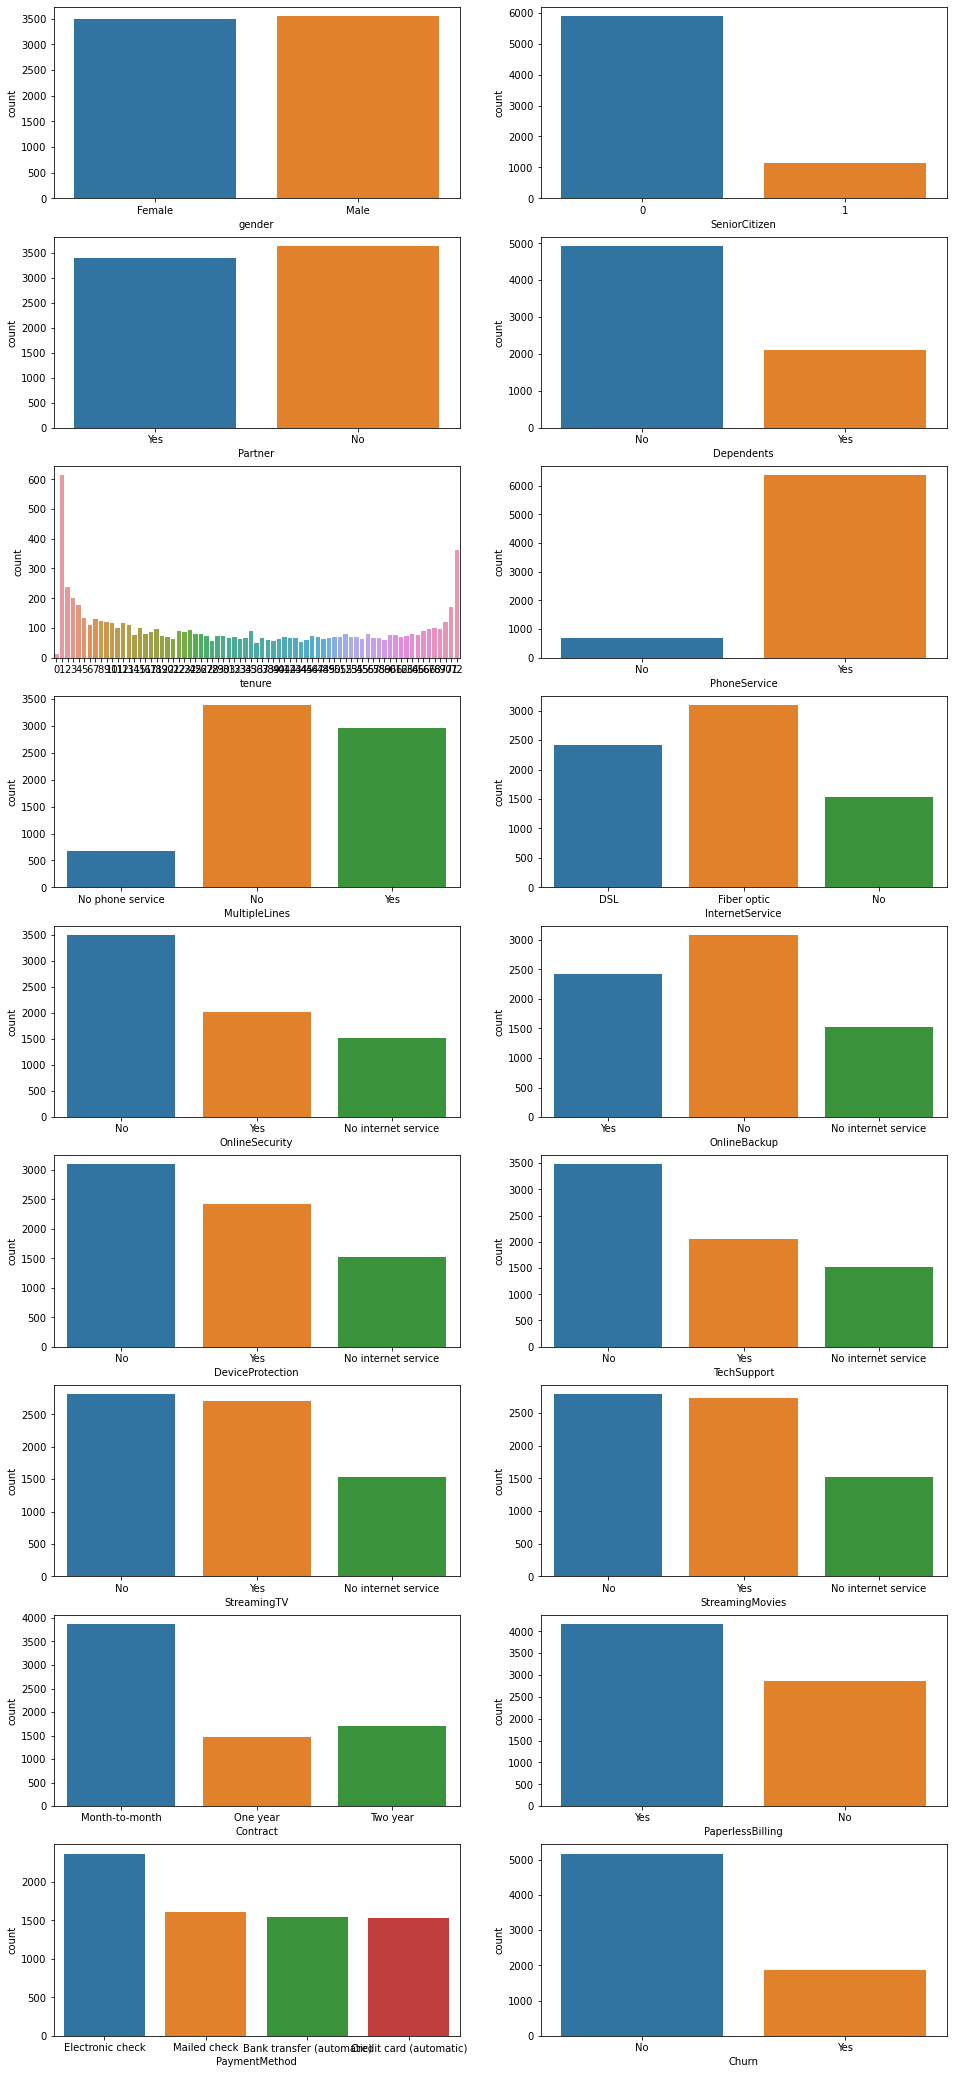

In [15]:
plt.figure(figsize=(16,50))
for index,col in enumerate(CC):
    plt.subplot(ncols,nrows,index+1)
    sns.countplot(churn[CC[index]])

Observation:
    
Gender - Males and females count in this dataset is almost equal.

Senior Citizen- There are very few senior citizens in the dataset.

Partner - Almost equal number of customers are with and without partners.

Dependents - Customers having no dependents are more and with dependents are less.

Phone service - Customers with phone service are the most in the dataset, very least are not having phone service.

Multiple Lines - Customers with no multiple lines are highest in count ,and with no phone service are the least.

Internet Service - Customers opting for fiber optic are more compared to DSL .There are few customers less than DSL who have not opted for internet services.

Online Security -  Customers having no online security are in more number than customers having online security.No internet service customers are least in this column.

Online Backup - Most of customers have not opted for onlione backup ,few have opted for online backup.No internet service customers are least in this column.

Device Protection -  Customers not having device protection are in more number than customers having device protection.No internet service customers are least in this column.

Tech Support -  Customers not opting for tech support are in more number than customers having tech support.No internet service customers are least in this column.

Streaming TV - Almost same count of customers are opting for streaming TV and not streaming TV.No internet service customers are least in this column.

Streaming Movies - Almost same count of customers are opting for streaming  movies and not streaming movies.No internet service customers are least in this column.

Contract - There are large number of customers with month to month contract.One year and two year contract customers lmost same count of customers are opting for streaming TV and not streaming TV.No internet service customers are least in this column are almost same in count.

PaperBilling - Paper billing is still prefered by large amount of customers.

Payment Method - Electronic Check method is mostly prefered form of payment mode.Customers opting for mailed check,bank transfer and credit card payment are almost in equal numbers.

Churn -  Customer churn is very less in this dataset.This is our target column.

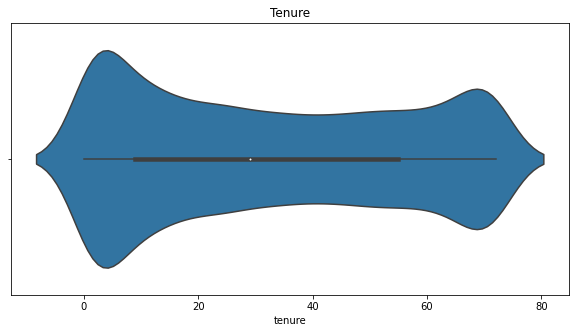

In [16]:
plt.figure(figsize=(10,5))
sns.violinplot(churn['tenure'])
plt.title('Tenure')
plt.show()

Observaitons:
    
More customers are with tenure from 0 to 10 years , also cumstomer with tenure more than 60  years are more.    

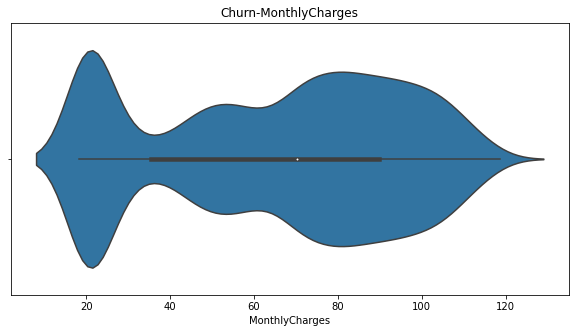

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(churn['MonthlyCharges'])
plt.title('Churn-MonthlyCharges')
plt.show()

Observastions:
    
Customers with monthly charges 20 are high  and futher leading customer with montlymcharges 30 to 40 are in less number.

Most of the customers are having monthly charges frp 70 to 100.

### Bivariate Analysis

<Figure size 360x720 with 0 Axes>

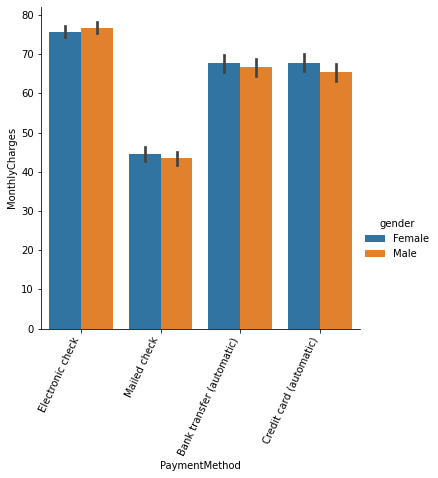

In [18]:
plt.figure(figsize=(5,10))
chart=sns.catplot(x='PaymentMethod',y='MonthlyCharges',hue='gender',data=churn,kind='bar',size=5)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Observation:
    
Monthly charges of customer paying through electronic check is highest and least with mail check.

Monthly charges of males is lesser than feamles in all payment method modes except electronic check. 
    

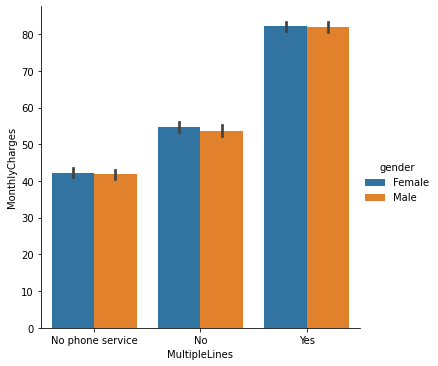

In [19]:
sns.catplot(y='MonthlyCharges',x='MultipleLines',hue='gender',data=churn,kind='bar')
plt.show()

Observation : 
    
1)Customers having multiple lines have higher monthly charges.

2)Customers with no phone service are having least phone service.

<Figure size 720x720 with 0 Axes>

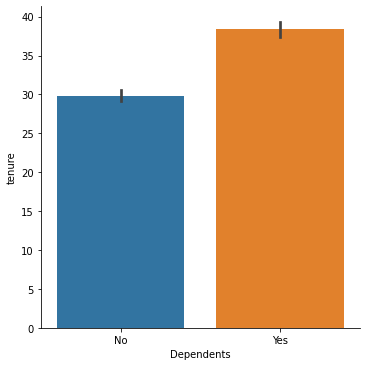

In [20]:
plt.figure(figsize=(10,10))
sns.catplot(y='tenure',x='Dependents',data=churn,kind='bar')
plt.show()

Observation:
    
Customers with dependent have more tenure     

<Figure size 720x720 with 0 Axes>

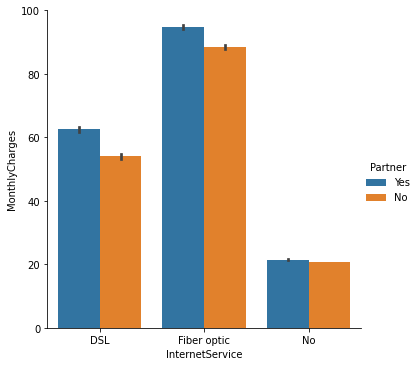

In [21]:
plt.figure(figsize=(10,10))
sns.catplot(y='MonthlyCharges',x='InternetService',hue='Partner',data=churn,kind='bar')
plt.show()

Observation:
    
People having fiber optic internet service have higher monthly charges.

Customer with partner have higher monthly charges.



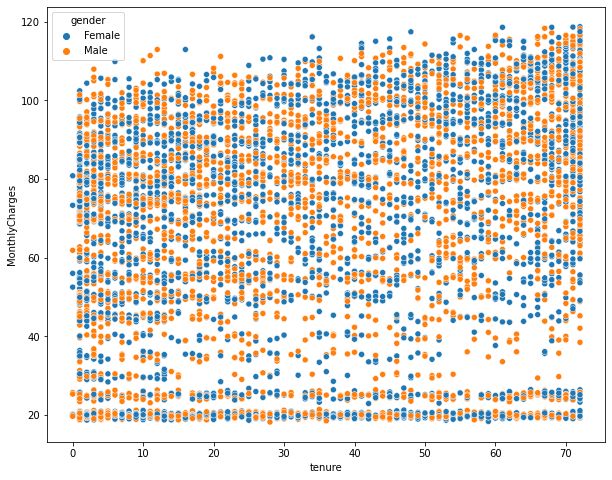

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='gender',data=churn)
plt.show()

Observation:
    
Monthly charges increases as tenure increases.



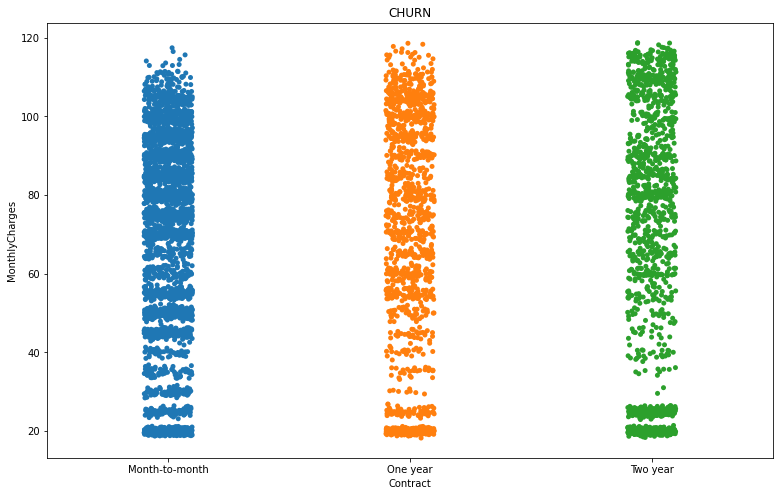

In [23]:
plt.figure(figsize=(13,8))
ax=sns.stripplot(churn['Contract'],churn['MonthlyCharges'])
ax.set(xlabel='Contract',ylabel='MonthlyCharges')
plt.title('CHURN')
plt.show()

Observation:
    
Monthly charges high of customers with teo year contract.

There are more customers with month to month contract and there monthly billing is mostly ranging from 70 to 110.

Negligible customers with two year contract have billing charges in range 30 to 50.

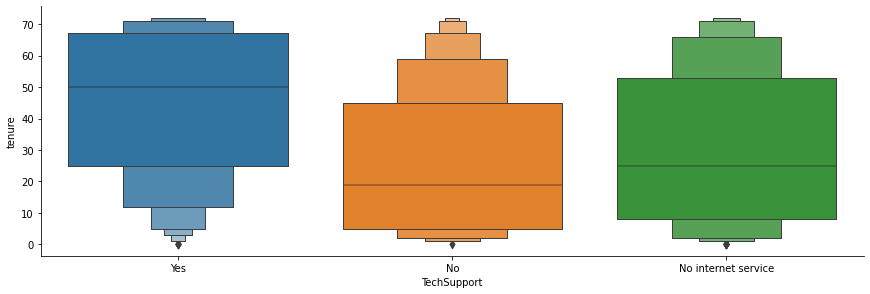

In [24]:
sns.catplot(y='tenure',x='TechSupport',data=churn.sort_values('tenure',ascending=False),kind='boxen',height=4,aspect=3)

Observation:
    
Customers availing tech support have higher tenure.


In [25]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Multivariate

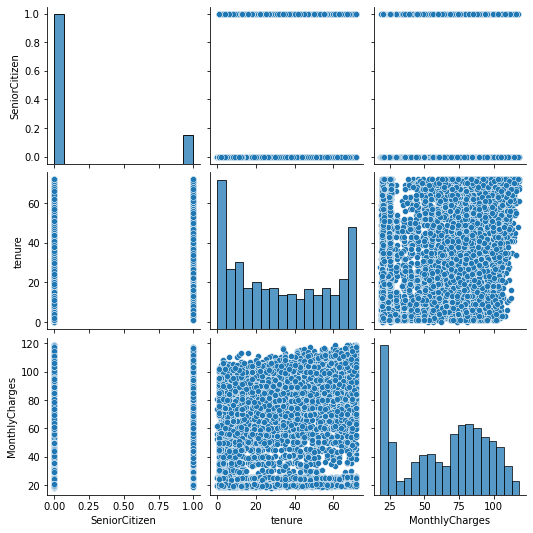

In [26]:
sns.pairplot(churn)

## Treating Missing Values

In [27]:
for i in CC:
    print('column name:',i,'and unique variables are ',churn[i].unique())

column name: gender and unique variables are  ['Female' 'Male']
column name: SeniorCitizen and unique variables are  [0 1]
column name: Partner and unique variables are  ['Yes' 'No']
column name: Dependents and unique variables are  ['No' 'Yes']
column name: tenure and unique variables are  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column name: PhoneService and unique variables are  ['No' 'Yes']
column name: MultipleLines and unique variables are  ['No phone service' 'No' 'Yes']
column name: InternetService and unique variables are  ['DSL' 'Fiber optic' 'No']
column name: OnlineSecurity and unique variables are  ['No' 'Yes' 'No internet service']
column name: OnlineBackup and unique variables are  ['Yes' 'No' 'No internet service']
column name: DeviceProtection and unique variables are  ['No' 'Yes' 'No inte

In [28]:
for i in CC:
    print('column name:',i,'and unique variables are \n ',churn[i].value_counts(),'\n')

column name: gender and unique variables are 
  Male      3555
Female    3488
Name: gender, dtype: int64 

column name: SeniorCitizen and unique variables are 
  0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

column name: Partner and unique variables are 
  No     3641
Yes    3402
Name: Partner, dtype: int64 

column name: Dependents and unique variables are 
  No     4933
Yes    2110
Name: Dependents, dtype: int64 

column name: tenure and unique variables are 
  1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
52     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58

In [29]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [30]:
#We could see totalCharges is continous type of column while visauly analysing the dataset.

#Data type seems to be object type, Which leads to possiblity of blank spaces.

we will change the  column from object to int type.

In [31]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors='coerce')

In [32]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

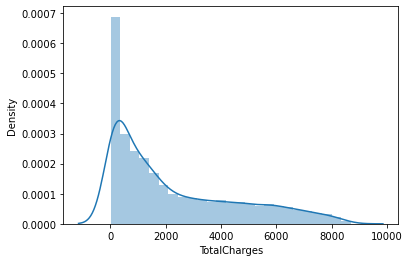

In [33]:
sns.distplot(churn['TotalCharges'])

As the data isn't normally distributed we will fill the null values with median

In [34]:
churn['TotalCharges']=churn['TotalCharges'].fillna(churn['TotalCharges'].median())

###### We will drop column customer ID as it will not help in building good model being not relevant data.

In [35]:
churn.drop('customerID',inplace=True,axis=1)

In [36]:
churn.shape

(7043, 20)

##### Now we have treated all the missing values

## Correlation

In [37]:
churn.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102652
tenure               0.016567  1.000000        0.247900      0.825464
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102652  0.825464        0.650864      1.000000

statistical cable for correlation of columns

<AxesSubplot:>

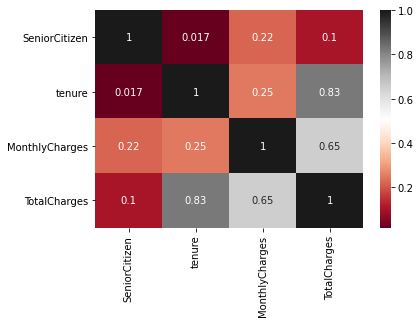

In [38]:
#Correlation Heat map

sns.heatmap(churn.corr(),annot=True,cmap='RdGy')

Observation:
    
Tenure and senior citizen columns are most negatively correlatted columns in dataset.

Monthly charges and total charges are most positively correlated columns in dataset.

## Outliers

##### We will check the outliers from numeric columns.

##### Box plot for outliers

<AxesSubplot:xlabel='MonthlyCharges'>

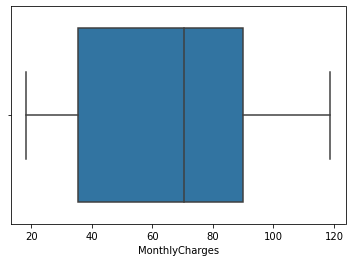

In [39]:
sns.boxplot(churn['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

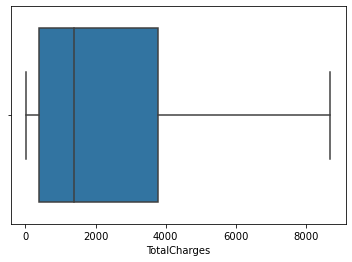

In [40]:
sns.boxplot(churn['TotalCharges'])

There are no outliers in the dataset.

## Encoding

In [41]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
CN=['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
CN

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
for i in CN:
    churn=pd.get_dummies(data=churn, columns=[i])
    
  

In [46]:
churn.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn  gender_Female  \
0              0       1           29.85         29.85    No              1   
1              0      34           56.95       1889.50    No              0   
2              0       2           53.85        108.15   Yes              0   
3              0      45           42.30       1840.75    No              0   
4              0       2           70.70        151.65   Yes              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            0           0            1              1               0   
1            1           1            0              1               0   
2            1           1            0              1               0   
3            1           1            0              1               0   
4            0           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   
3                1                 0                 0   
4                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0 

In [47]:
LLE=['SeniorCitizen','tenure','Churn']
LLE

['SeniorCitizen', 'tenure', 'Churn']

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
LE=LabelEncoder()

In [50]:
for i in LLE:
    churn[i]=LE.fit_transform(churn[i].values.reshape(-1,1))

In [51]:
churn.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [52]:
churn.head(3)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0            0           0            1              1               0   
1            1           1            0              1               0   
2            1           1            0              1               0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0                1                 0                 0   
1                0                 1                 1   
2                0                 1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                

## Data Spliting

In [53]:
x=churn.drop('Churn',axis=1)
y=churn.iloc[:,4:5]

In [54]:
x.shape

(7043, 45)

In [55]:
y.shape

(7043, 1)

We have checked initialy while exploring that label column is imbalanced.

In [56]:
y.value_counts()

Churn
0        5174
1        1869
dtype: int64

### Correcting Imbalancing

In [57]:
import imblearn

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [60]:
y_over.value_counts()

Churn
1        5174
0        5174
dtype: int64

we can see that oversampling is succesfully applied for the target

In [61]:
x_over.shape

(10348, 45)

In [62]:
y_over.shape

(10348, 1)

### Skewness

In [63]:
x_over.skew()

SeniorCitizen                              2.164662
tenure                                     0.507948
MonthlyCharges                            -0.412280
TotalCharges                               1.108076
gender_Female                              0.295044
gender_Male                                0.271147
Partner_No                                 0.006186
Partner_Yes                                0.496315
Dependents_No                             -0.883271
Dependents_Yes                             1.375047
PhoneService_No                            3.039398
PhoneService_Yes                          -2.551720
MultipleLines_No                           0.341607
MultipleLines_No phone service             3.039398
MultipleLines_Yes                          0.481974
InternetService_DSL                        0.887822
InternetService_Fiber optic               -0.037507
InternetService_No                         1.840179
OnlineSecurity_No                         -0.191075
OnlineSecuri

##### We will have to correct the skewness of TotalCharges

In [64]:
x_over['TotalCharges']=np.sqrt(x_over['TotalCharges'])
x_over['TotalCharges'].skew()

0.4275938551387633

Skewness of all the three columns is within the limit of -0.5 to 0.5.

## Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)

In [67]:
x_over.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0            0.0  0.013889        0.115423      0.012690            1.0   
1            0.0  0.472222        0.385075      0.440402            0.0   
2            0.0  0.027778        0.354229      0.068241            0.0   
3            0.0  0.625000        0.239303      0.434049            0.0   
4            0.0  0.027778        0.521891      0.089794            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0          0.0         0.0          1.0            1.0             0.0   
1          1.0         1.0          0.0            1.0             0.0   
2          1.0         1.0          0.0            1.0             0.0   
3          1.0         1.0          0.0            1.0             0.0   
4          0.0         1.0          0.0            1.0             0.0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0              1.0               0.0               0.0   
1              0.0               1.0               1.0   
2              0.0               1.0               1.0   
3              1.0               0.0               0.0   
4              0.0               1.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                             1.0                0.0                  1.0   
1                             0.0                0.0                  1.0   
2                             0.0                0.0                  1.0   
3                             1.0                0.0                  1.0   
4                             0.0                0.0                  0.0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                          0.0                 0.0                1.0   
1                          0.0                 0.0                0.0   
2                          0.0                 0.0                0.0   
3                          0.0                 0.0                0.0   
4                          1.0                 0.0                1.0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                 0.0                 0.0              0.0   
1                                 0.0                 1.0              1.0   
2                                 0.0                 1.0              0.0   
3                                 0.0                 1.0              1.0   
4                                 0.0                 0.0              1.0   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                               0.0               1.0                  1.0   
1                               0.0               0.0                  0.0   
2                               0.0               1.0                  1.0   
3                               0.0               0.0                  0.0   
4                               0.0               0.0                  1.0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                   0.0                   0.0             1.0   
1                                   0.0                   1.0             1.0   
2                                   0.0                   0.0             1.0   
3                                   0.0                   1.0             0.0   
4                                   0.0                   0.0             1.0   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                              0.0              0.0             1.0   
1                              0.0              0.0             1.0   
2                              0.0              0.0             1.0   
3                              0.0              1.0             1.0   
4                              0.0              0.0             1.0   

   S

#### Data is ready for model execution after treating the missing values,encoding,removing skewness and scaling.

## Model Execution

In [68]:
#Best random_state for model execution.
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    ac=accuracy_score(y_test,pred)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best Accuracy score is',maxAccu*100,'at random state',maxRS)

Best Accuracy score is 87.43961352657004 at random state 71


#### We will consider random_state 71 for all the models

### Logistic Regression

In [69]:
    LG=LogisticRegression(random_state=71)
    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=71)
Accuracy score: 85.47504025764894


confusion matrix 
 [[1373  161]
 [ 290 1281]]


classification report
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1534
           1       0.89      0.82      0.85      1571

    accuracy                           0.85      3105
   macro avg       0.86      0.86      0.85      3105
weighted avg       0.86      0.85      0.85      3105



cross validation score
cross val score [0.68164251 0.74444444 0.91304348 0.92315128 0.92750121]
cross val score mean: 83.79565847815579


Difference between accuracy score and cross val mean score : 0.01679381779493161




### Hyper parameter tunning using GridSearchCV for Logistic Regression

In [70]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty': ['l2'],'tol':[0.0001,0.001,0.01],'multi_class' : ['auto', 'ovr', 'multinomial']}

grid_search_LG=GridSearchCV(estimator=LG,param_grid=params,cv=7,n_jobs=-1,verbose=1)

grid_search_LG.fit(x_train,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=7, estimator=LogisticRegression(random_state=71), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [71]:
Best_LG=grid_search_LG.best_estimator_
Best_LG

LogisticRegression(random_state=71)

In [72]:
grid_search_LG.best_score_

0.8608307203126814

In [73]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [74]:
evaluate_model(Best_LG)

Train Accuracy : 0.8637304984122601
Train Confusion Matrix:
[[3263  377]
 [ 610 2993]]
--------------------------------------------------
Test Accuracy : 0.8547504025764895
Test Confusion Matrix:
[[1373  161]
 [ 290 1281]]


In [75]:
    grid_search_LG.score(x_train,y_train)
    predl=grid_search_LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,predl)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predl))
    print('\n')
    print('classification report\n',classification_report(y_test,predl))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_LG,x_over,y_over,cv=9)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predl)-(score.mean())))
    print('\n')

The model is: LogisticRegression(random_state=71)
Accuracy score: 85.47504025764894


confusion matrix 
 [[1373  161]
 [ 290 1281]]


classification report
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1534
           1       0.89      0.82      0.85      1571

    accuracy                           0.85      3105
   macro avg       0.86      0.86      0.85      3105
weighted avg       0.86      0.85      0.85      3105



cross validation score
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 f

Difference between accuracy score and cross val mean score : 0.05248276122883766 at CV=3.
    
Difference between accuracy score and cross val mean score : 0.012865792011356958 at CV=5
    
Difference between accuracy score and cross val mean score : 0.004931036109930398  at CV=7
    
Difference between accuracy score and cross val mean score : 0.0004971346644634389 at CV=9.    

#### AUC ROC CURVE FOR LOGISTIC REGRESSION

In [76]:
from sklearn.metrics import plot_roc_curve

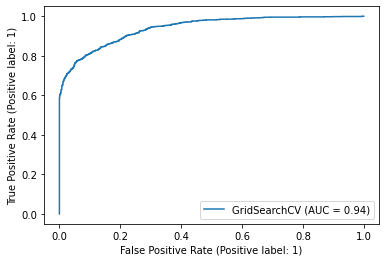

In [77]:
plot_roc_curve(grid_search_LG,x_test, y_test)
plt.show()

In [78]:
auc_score_LG=roc_auc_score(y_test,predl)
auc_score_LG*100

85.52249167397675

#### Logistic Regression after hyper tunning is giving us the best performance of 84.78% and at cross fold = 7 we are getting least difference of 0.0004 between best score and croos val mean score

### KNNeighbors Classifier

In [79]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [80]:
    KNN.fit(x_train,y_train)
    KNN.score(x_train,y_train)
    predk=KNN.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predk)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predk))
    print('\n')
    print('classification report\n',classification_report(y_test,predk))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNN,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predk)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier()
Accuracy score: 83.18840579710145


confusion matrix 
 [[1260  274]
 [ 248 1323]]


classification report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1534
           1       0.83      0.84      0.84      1571

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



cross validation score
cross val score [0.65449275 0.86633807 0.87880545]
cross val score mean: 79.98787578280059


Difference between accuracy score and cross val mean score : 0.03200530014300862




KNeighbours: ACCURACY SCORE-->82.54%

DIFF. BETWEEN ACCURACY SCORE AND CROSS VAL MEAN SCORE IS--> 0.02%

### Hyper parameter tunning using GridSearchCV for KNNeighbors Classifier

In [82]:
params = { 'algorithm':['ball_tree','kd_tree'], 'leaf_size':[30,60], 'p':[3,2,4,5]}

KNC=GridSearchCV(estimator=KNN,param_grid=params,cv=3,n_jobs=-1)

KNC.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [30, 60], 'p': [3, 2, 4, 5]})

In [83]:
KN=KNC.best_estimator_
KN

KNeighborsClassifier(algorithm='ball_tree', p=4)

In [84]:
KNC.best_score_

0.826866513088191

In [85]:
evaluate_model(KN)

Train Accuracy : 0.8903769156426895
Train Confusion Matrix:
[[3254  386]
 [ 408 3195]]
--------------------------------------------------
Test Accuracy : 0.8315619967793881
Test Confusion Matrix:
[[1258  276]
 [ 247 1324]]


In [86]:
%%time
    KNC.score(x_train,y_train)
    predn=KNC.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predn)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predn))
    print('\n')
    print('classification report\n',classification_report(y_test,predn))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNC,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predn)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier()
Accuracy score: 83.15619967793882


confusion matrix 
 [[1258  276]
 [ 247 1324]]


classification report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1534
           1       0.83      0.84      0.84      1571

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



cross validation score
cross val score [0.65449275 0.86749783 0.87909539]
cross val score mean: 80.03619896826497


Difference between accuracy score and cross val mean score : 0.031200007096738425


Wall time: 6min 13s


### AUC ROC CURVE FOR KNeighbors Classifier

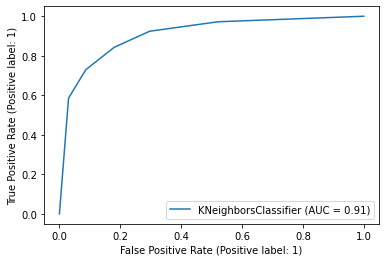

In [118]:
plot_roc_curve(KN,x_test, y_test)
plt.show()

In [119]:
auc_score_KN=roc_auc_score(y_test,predn)
auc_score_KN*100

83.14267646065379

#### KNeighbors Classifier after hyper tunning is giving us the best performance of 80.03% and at cross fold = 3 we are getting least difference of 0.0312 between best score and croos val mean score

### Random Forest Classifier

In [87]:
rf=RandomForestClassifier(n_estimators=150)

In [88]:
    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('classification report \n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 0.8528180354267311
confusion matrix 
 [[1339  195]
 [ 262 1309]]
classification report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1534
           1       0.87      0.83      0.85      1571

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



cross validation score
cross val score [0.68405797 0.74057971 0.90724638 0.92218463 0.92798453]
cross val score mean: 0.8364106443636568
Best score: 0.016407391063074317




### HYPER PARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [89]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10,20,30,50,100,150]
}


grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 20, 30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [90]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=150)

In [91]:
rf_best=grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=150)

In [92]:
grid_search_rf.best_score_

0.8590351890616125

In [93]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [94]:
evaluate_model(rf_best)

Train Accuracy : 0.9030788347369875
Train Confusion Matrix:
[[3310  330]
 [ 372 3231]]
--------------------------------------------------
Test Accuracy : 0.849597423510467
Test Confusion Matrix:
[[1300  234]
 [ 233 1338]]


In [95]:
%%time    
    grid_search_rf.score(x_train,y_train)
    predr=grid_search_rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,predr)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predr))
    print('\n')
    print('classification report\n',classification_report(y_test,predr))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predr)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 84.9597423510467


confusion matrix 
 [[1300  234]
 [ 233 1338]]


classification report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1534
           1       0.85      0.85      0.85      1571

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



cross validation score
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
cross val score [0.70821256 0.75942029 0.89275362 0.91155147 0.90913485]
cross val score mean: 83.62145590649173


Difference between accuracy score and cross val mean score : 0

Difference between accuracy score and cross val mean score : 0.03883112050495163 at CV : 3
        
Difference between accuracy score and cross val mean score : 0.013382864445549592 at CV : 5         

### AUC ROC CURVE FOR RF

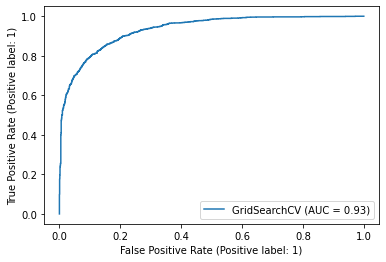

In [96]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid_search_rf,x_test, y_test)
plt.show()


In [97]:
auc_score=roc_auc_score(y_test,pred)
auc_score*100

85.30542998629828

#### Random Forest Classifier after hyper tunning is giving us the best performance of 83.62% and at cross fold = 5 we are getting least difference of 0.0156 between best score and croos val mean score

### DecissionTree Classifier

In [98]:
    DTC=DecisionTreeClassifier(random_state=71)
    DTC.fit(x_train,y_train)
    DTC.score(x_train,y_train)
    pred=DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(DTC,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean()))*100)
    print('\n')

The model is: DecisionTreeClassifier(random_state=71)
Accuracy score: 79.96779388083736


confusion matrix 
 [[1224  310]
 [ 312 1259]]


classification report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1534
           1       0.80      0.80      0.80      1571

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



cross validation score
cross val score [0.72604684 0.73314407 0.71682044 0.71946023 0.73863636]
cross val score mean: 72.68215892960836


Difference between accuracy score and cross val mean score : 7.285634951228992




### Hyper parameter tunning using GridSearchCV for Decision Tree Classifier

In [99]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50]}

grid_search_DTC=GridSearchCV(estimator=DTC,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search_DTC.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=71), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [100]:
Best_dtc=grid_search_DTC.best_estimator_
Best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=71)

In [101]:
grid_search_DTC.best_score_

0.8236933263176358

In [102]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [103]:
evaluate_model(Best_dtc)

Train Accuracy : 0.886649178517189
Train Confusion Matrix:
[[3288  352]
 [ 469 3134]]
--------------------------------------------------
Test Accuracy : 0.8148148148148148
Test Confusion Matrix:
[[1272  262]
 [ 313 1258]]


In [104]:
    grid_search_DTC.score(x_train,y_train)
    predt=grid_search_DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,predt)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predt))
    print('\n')
    print('classification report\n',classification_report(y_test,predt))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_DTC,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predt)-(score.mean())))
    print('\n')

The model is: DecisionTreeClassifier(random_state=71)
Accuracy score: 81.48148148148148


confusion matrix 
 [[1272  262]
 [ 313 1258]]


classification report
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1534
           1       0.83      0.80      0.81      1571

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



cross validation score
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
cross val score [0.70723462 0.7254902  0.80175913 0.8

Difference between accuracy score and cross val mean score : 0.041990177553857144 at CV : 3
        
Difference between accuracy score and cross val mean score : 0.013294091367935024 at CV : 5 
        
Difference between accuracy score and cross val mean score : -0.002560719225967789 at CV : 7        

### AUC ROC CURVE FOR DTC

<Figure size 1080x1080 with 0 Axes>

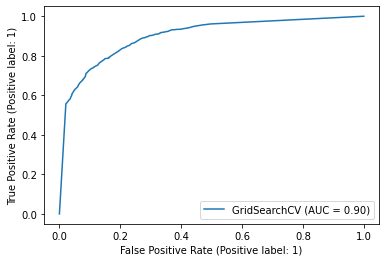

In [105]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(15,15))
plot_roc_curve(grid_search_DTC,x_test, y_test)
plt.show()

In [106]:
auc_score=roc_auc_score(y_test,grid_search_DTC.predict(x_test))
auc_score*100

81.49842691481936

##### DecisionTree Classifier after hyper tunning is giving us the best performance of 81.73% and at cross fold = 7 we are getting least difference of 0.01250 between best score and croos val mean score

### ADA BOOST CLASSIFIER

In [107]:
ad=AdaBoostClassifier(n_estimators=200)

In [108]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred_y=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred_y))
    print('confusion matrix \n',confusion_matrix(y_test,pred_y))
    print('classification report \n',classification_report(y_test,pred_y))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred_y)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=200)
Accuracy score: 0.8576489533011272
confusion matrix 
 [[1340  194]
 [ 248 1323]]
classification report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1534
           1       0.87      0.84      0.86      1571

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



cross validation score
cross val score [0.69371981 0.75410628 0.90917874 0.91735138 0.92315128]
cross val score mean: 0.8395014978413806
Best score: 0.01814745545974661




### HYPER PARAMETER TUNNING FOR ADA BOOST CLASSIFIER

In [109]:
paramss = {
     
    'learning_rate': [0.5,0.8,0.9],
    'n_estimators': [50,100,150,200]
}


ada_HT = GridSearchCV(
                           estimator=ad,
                           param_grid=paramss,
                           cv = 5,
                           )

ada_HT.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=200),
             param_grid={'learning_rate': [0.5, 0.8, 0.9],
                         'n_estimators': [50, 100, 150, 200]})

In [110]:
ada_HT.best_estimator_

AdaBoostClassifier(learning_rate=0.8, n_estimators=200)

In [111]:
ad_best=ada_HT.best_estimator_
ad_best

AdaBoostClassifier(learning_rate=0.8, n_estimators=200)

In [112]:
evaluate_model(ad_best)

Train Accuracy : 0.8693911362695016
Train Confusion Matrix:
[[3205  435]
 [ 511 3092]]
--------------------------------------------------
Test Accuracy : 0.855072463768116
Test Confusion Matrix:
[[1335  199]
 [ 251 1320]]


In [114]:
    ada_HT.score(x_train,y_train)
    preda=ada_HT.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,preda)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,preda))
    print('\n')
    print('classification report\n',classification_report(y_test,preda))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ada_HT,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,preda)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=200)
Accuracy score: 85.5072463768116


confusion matrix 
 [[1335  199]
 [ 251 1320]]


classification report
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1534
           1       0.87      0.84      0.85      1571

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



cross validation score
cross val score [0.68888889 0.75797101 0.89806763 0.91155147 0.90913485]
cross val score mean: 83.31227716253038


Difference between accuracy score and cross val mean score : 0.02194969214281217




Difference between accuracy score and cross val mean score : 0.05895742377192581 at CV : 3
        
Difference between accuracy score and cross val mean score : 0.02194969214281217 at CV : 5        

### AUC ROC CURVE FOR AdaBoostClassifer

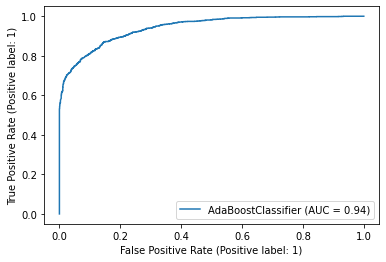

In [115]:
plot_roc_curve(ad_best,x_test, y_test)
plt.show()

In [117]:
auc_score_ad=roc_auc_score(y_test,preda)
auc_score_ad*100

85.52514737040408

#### Ada Boost Classifier model after hyper tunning is giving us the best performance of 83.31% and at cross fold = 5 we are getting least difference of 0.0219 between best score and croos val mean score

In [129]:
#Predicted Values:
    
    
print('the predicted value :',predl[:5])
print('The actual value:',y_test[:5])    

the predicted value : [1 1 0 0 0]
The actual value:       Churn
7818      1
8037      1
4258      1
5707      0
4440      0


### Conclusion:
    
After running all the models we could understand logistic classifier is best performing model with accuracy score 84.78% at 9 cross folds,also confusion matrix and classification report are justiying the better score .




### confusion matrix 

 [[1373  161]

 [ 290 1281]]

    



### classification report

               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1534
           
           1       0.89      0.82      0.85      1571

## Joblib

In [121]:
joblib.dump(grid_search_LG,'churn.obj')

['churn.obj']